<a href="https://colab.research.google.com/github/adimemes/Clustering/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_I_Kadek_Adi_Memes_Subagia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from joblib import dump

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
url = "/content/drive/MyDrive/bank_transactions_data_edited.csv"
Bank_data = pd.read_csv(url)

In [4]:
Bank_data.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [5]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

kemudian ada .info() yang mengeluarkan output info dari setiap kolom pada dataset mulai dari nama kolom, jumlah barisnya dan juga type data dari kolomnya.
untuk lebih rinci kolom setiap data yaitu :


| Fitur                 | Deskripsi                          |
| --------------------- | ---------------------------------- |
| `TransactionAmount`   | Nilai transaksi                    |
| `TransactionType`     | Debit / Credit                     |
| `Location`            | Kota asal transaksi                |
| `Channel`             | ATM / Online / Branch              |
| `CustomerAge`         | Umur pelanggan (ada missing value) |
| `CustomerOccupation`  | Pekerjaan pelanggan                |
| `TransactionDuration` | Lama waktu transaksi (detik?)      |
| `LoginAttempts`       | Jumlah percobaan login             |
| `TransactionID`       | Id Transaksi pelanggan             |
| `AccountID`           | Acount Id pelanggan                |
| `IP Address`          | IP Addres dari Pelanggan           |
| `DeviceID`            | ID Device dari pelanggan           |
| `MerchantID `         | ID MErchant                        |


In [6]:
Bank_data.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


## **Exploratory Data Analysis**
**Visualisasi Data**

1.   Heatmap Korelasi Fitur Numerik
2.   Histogram Numerik Data
3.   Scaterplot Transaksi Berdasarkan Umur



**Heatmap Korelasi Fitur Numerik**


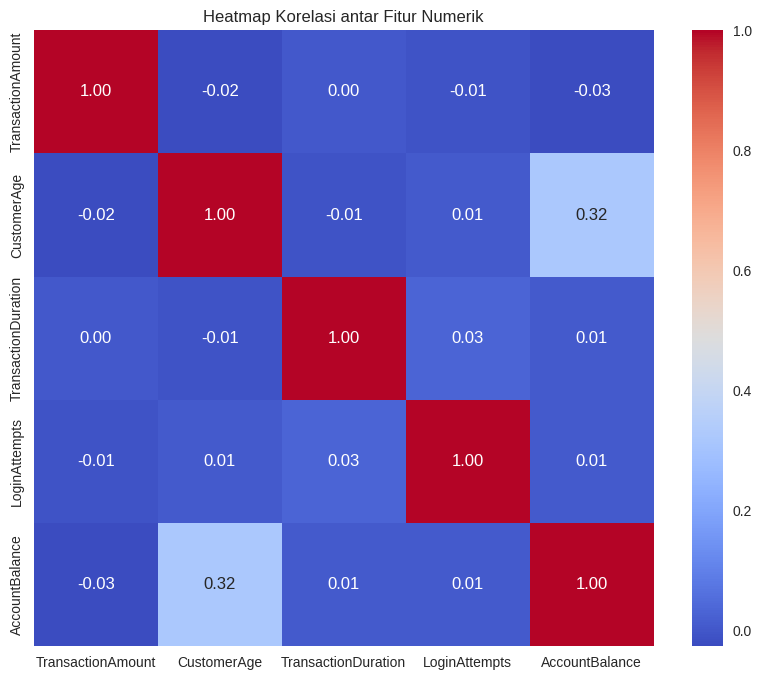

In [7]:
# Mengambil data numerik pada data
numerik_data = Bank_data.select_dtypes(include='number')

# Menghitung korelasi
corr = numerik_data.corr()

# Visualisasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi antar Fitur Numerik")
plt.show()

Pada Visualisasi di atas terlihat korelasi setiap data numerik satu dengan yang lain cenderung kurang, bisa dilihat dari warna kotak yang ada jika warna memerah menandakan adanya korelasi yang kuat antar fitur, sebaliknya jika biru menandakan korelasi yang lemah antar fitur <br>
dan pada visualisasi di atas yang memiliki korelasi kuat hanya Kolom **CustumerAge** dengan **AccountBalance**

**Histogram numerik**

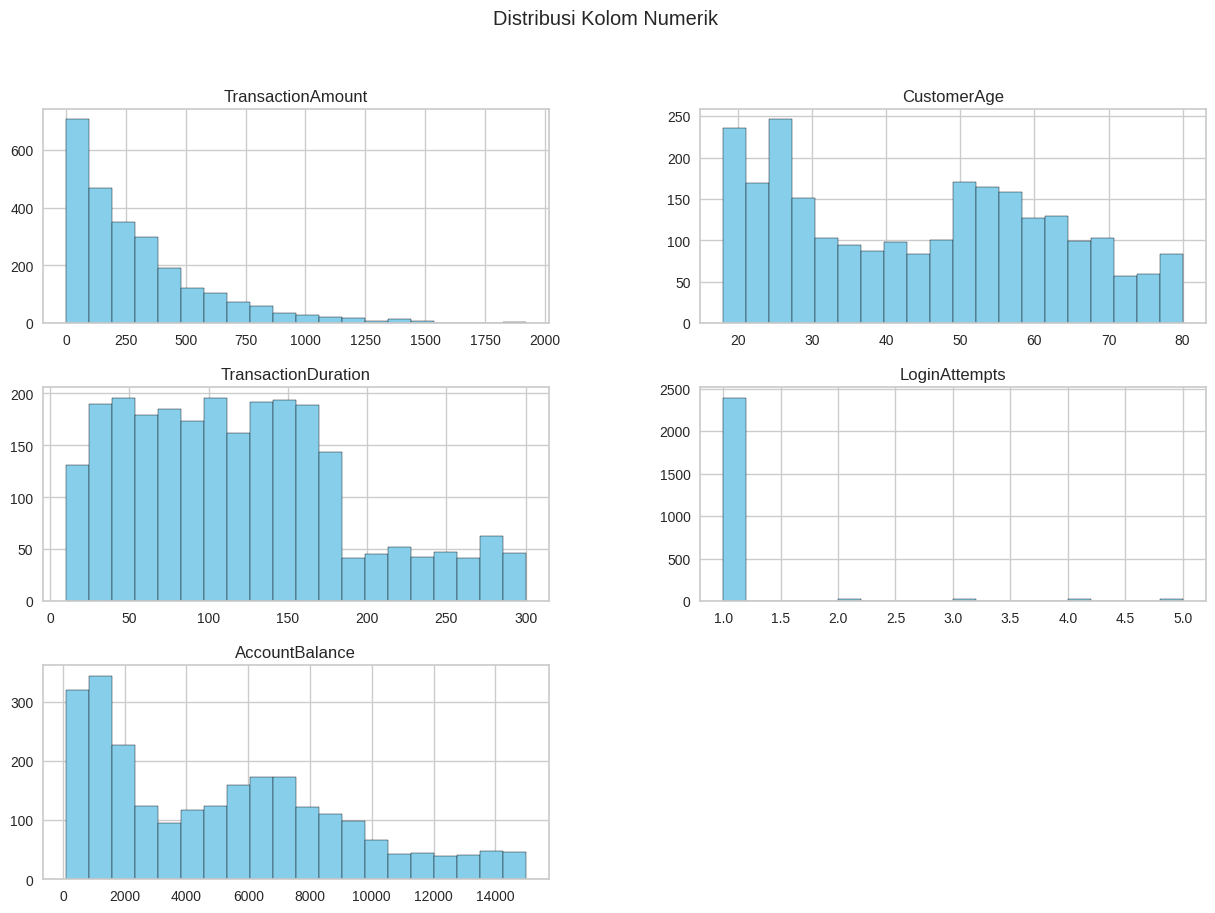

In [8]:
numerik_data.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Kolom Numerik")
plt.show()

Visualisasi ini adalah mengenai distribusi fitur numerik yang berada di dataset, pada data histogram ini bisa kita analysis frekuensi kemunculan nilai pada suatu kolom data, contohnya yaitu pada kolom **CostumerAge** data dengan kemunculan terbanyak itu diantara 20-30 tahun dengan di tandai barchart yang paling tinggi, begitu pula dengan data kolom yang lain kita bisa melihat frekuensi kemunculan datanya

**scatterplot**

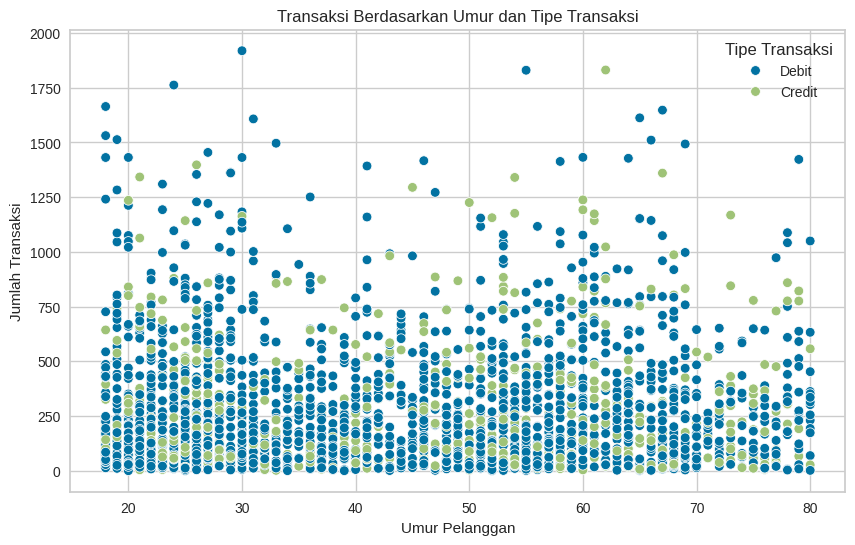

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Bank_data, x='CustomerAge', y='TransactionAmount', hue='TransactionType')
plt.title('Transaksi Berdasarkan Umur dan Tipe Transaksi')
plt.xlabel('Umur Pelanggan')
plt.ylabel('Jumlah Transaksi')
plt.legend(title='Tipe Transaksi')
plt.show()

Visualisasi ini menggunakan scatterplot visualisasi ini juga bisa digunakan untuk melihat korelasi antar kolom, disini menggunakan fitur **CostumerAge** dan **TransactionAmount** terlihat dari visualisai bentuk titik titik yang melambangkan kedua kolom itu tidak memiliki korelasi sama sekali, ini sesuai dengan visualisasi heatmap di awal yang mengatakan korelasi antar kolom tidak terlalu kuat

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


Sebelum melakukan suruhan pada thapan pembersihan dan pemrosesan data, ada kejanggalan pada type data  dan  

*   ```TransactionDate```
*   ```PreviousTransactionDate```

yang masih bertype object dan disini akan dirubah menjadi type data datetime

In [10]:
Bank_data[['TransactionDate', 'PreviousTransactionDate']] = Bank_data[['TransactionDate', 'PreviousTransactionDate']].apply(pd.to_datetime)

**Memeriksa Missing Value**

In [11]:
print("Jumlah Missing Value di setiap kolom:")
print(Bank_data.isnull().sum())

Jumlah Missing Value di setiap kolom:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


**Memeriksa Duplikasi**

In [12]:
print("Jumlah Duplikasi Data:")
print(Bank_data.duplicated().sum())

Jumlah Duplikasi Data:
21


**Feature Scaling (MinMaxScaler)** <br>
Pada Tahapan ini adalah mengubah skala data numerik ke dalam rentang tertentu, biasanya antara 0 dan 1.dan juga pada kode dibawah ini ada penambahan kolom baru yaitu kolom **Age** untuk digunakan dalam binning nantinya, jika tidak membuat kolom tersebut prosses binning akan terganggu karena data setelah MinMaxSclaer rentangnya 0 sampai 1


In [13]:
# menambah colom Age pada dataframe
Bank_data_Age = Bank_data['CustomerAge']
numerical_cols = Bank_data.select_dtypes(include='number').columns.tolist()
print(numerical_cols)

scaler = MinMaxScaler()
Bank_data[numerical_cols] = scaler.fit_transform(Bank_data[numerical_cols])
Bank_data['Age'] = Bank_data_Age
# Cek hasil
Bank_data.head(5)

['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Age
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08,70.0
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35,68.0
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04,19.0
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06,26.0
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39,NaN


**Drop kolom** <br>
Pada tahapan ini adalah menghapus kolom yang sekiranya tidak terlalu penting dalam pembuatan model nantinya dengan bantuan ```.drop()```

In [14]:
Bank_data = Bank_data.drop(['TransactionID', 'AccountID', 'DeviceID',  'IP Address', 'MerchantID', 'TransactionDate', 'PreviousTransactionDate', 'LoginAttempts' ], axis=1, errors='ignore')

**Feature Encoding (LabelEncoder)** <br>
Pada Tahapan ini adalah merubah kolom data yang bertipe katagorikal menjadi sebuah data numerik, dalam proyek ini menggunakan Label Encoder dimana nantinya data dari kolom katagorikal akan berubah menjadi nilai numerik yang bernilai angka integer (0, 1, 2, 3, dst.)

In [15]:
categorical_cols = Bank_data.select_dtypes(include='object').columns

le = LabelEncoder()
Bank_data_Encoder = Bank_data.copy()
for col in categorical_cols:
    Bank_data_Encoder[col] = le.fit_transform(Bank_data[col])

# Cek hasil
Bank_data[categorical_cols] = Bank_data_Encoder[categorical_cols]
Bank_data.head(5)

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,Age
0,0.007207,1,36,0,0.838710,0,0.244828,0.336832,70.0
1,0.195940,1,15,0,0.806452,0,0.451724,0.918055,68.0
2,0.065680,1,23,2,0.016129,3,0.158621,0.068637,19.0
3,0.096016,1,33,2,0.129032,3,0.051724,0.569198,26.0
4,0.006874,0,1,2,NaN,3,0.648276,0.492591,NaN


In [16]:
Bank_data.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'AccountBalance',
 'Age']

**Menangani Missing Value** <br>
Tahapan ini adalah pembersihan data dari missing value menggunakan ```dropna()``` yang membuat data yang missing value akan dihapus dalam dataset

In [17]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
Bank_data = Bank_data.dropna()
Bank_data.isnull().sum()

,0
TransactionAmount,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
AccountBalance,0
Age,0


**Menangani Duplikasi Data** <br>
Tahapan ini sama dengan missing value yaitu menghapus data yang duplikasi namun pada kasus ini menggunakan ```drop()```

In [18]:
Bank_data = Bank_data.drop_duplicates()
Bank_data.duplicated().sum()

np.int64(0)

In [19]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2417 entries, 0 to 2524
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2417 non-null   float64
 1   TransactionType      2417 non-null   int64  
 2   Location             2417 non-null   int64  
 3   Channel              2417 non-null   int64  
 4   CustomerAge          2417 non-null   float64
 5   CustomerOccupation   2417 non-null   int64  
 6   TransactionDuration  2417 non-null   float64
 7   AccountBalance       2417 non-null   float64
 8   Age                  2417 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 188.8 KB


**Pembersihan Data Outlier** <br>
Tahapan ini adalah untuk membersihkan data anomali, atau data yang berada di luar outlier menggunakan cara IQR (Interquartile Range) seperti kode dibawah ini

In [20]:
Q1 = Bank_data.quantile(0.25)
Q3 = Bank_data.quantile(0.75)
IQR = Q3 - Q1

# Buang data di luar rentang IQR
Bank_data = Bank_data[~((Bank_data < (Q1 - 1.5 * IQR)) | (Bank_data > (Q3 + 1.5 * IQR))).any(axis=1)]


**Binning Data dan Encoding** <br>
Pada tahapan ini adalah binning atau penambahan label, disini mengambil kolom ```Age``` yang dibuat berdasarkan colom ```CostumerAge``` pada code dibawah ini kemudian data tersebut di visualisasikan menggunakan bar chart, dan juga menambahkan pada colom ```Age``` kemudian dilakukannya Encoding menggunakan LabelEncoder

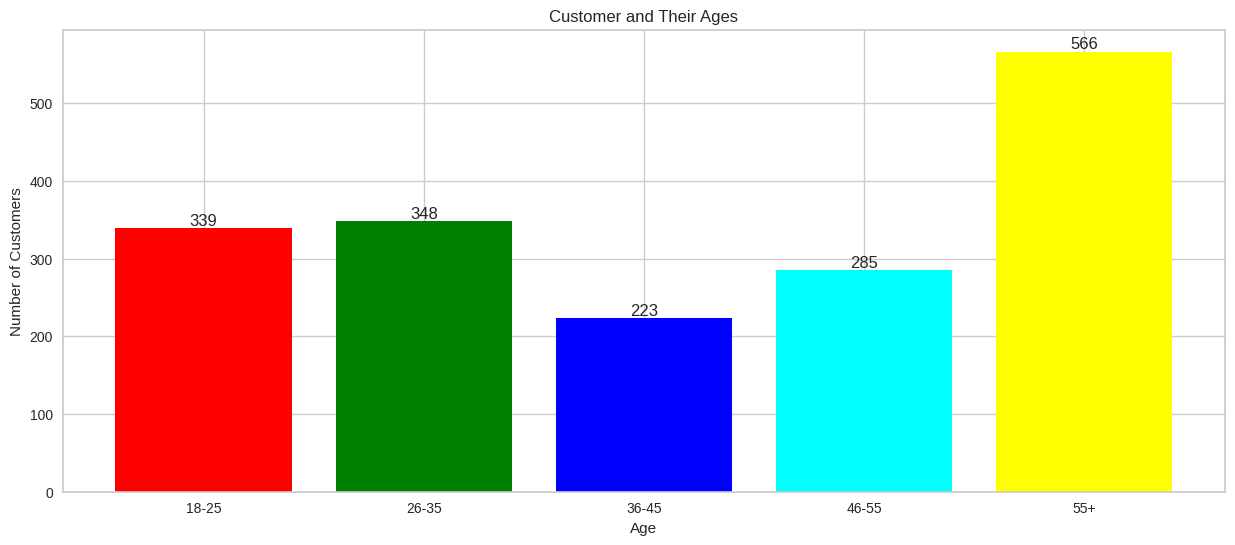

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,Customer_Age_encoded
0,0.007207,1,36,0,0.838710,0,0.244828,0.336832,5
1,0.195940,1,15,0,0.806452,0,0.451724,0.918055,5
2,0.065680,1,23,2,0.016129,3,0.158621,0.068637,1
3,0.096016,1,33,2,0.129032,3,0.051724,0.569198,2
5,0.047888,1,28,0,0.000000,3,0.558621,0.045738,1


In [21]:
age18_25 = Bank_data.Age[(Bank_data.Age >= 18) & (Bank_data.Age <= 25)]
age26_35 = Bank_data.Age[(Bank_data.Age >= 26) & (Bank_data.Age <= 35)]
age36_45 = Bank_data.Age[(Bank_data.Age >= 36) & (Bank_data.Age <= 45)]
age46_55 = Bank_data.Age[(Bank_data.Age >= 46) & (Bank_data.Age <= 55)]
age55above = Bank_data.Age[Bank_data.Age >= 56]

# menyusun data untuk plotting
x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')
plt.show()

bins = [17, 25, 35, 45, 55, Bank_data['Age'].max()]
labels = ['18-25', '26-35', '36-45', '46-55', '55+']

# Melakukan binning pada CustomerAge
Bank_data['Customer_Age_binned'] = pd.cut(Bank_data['Age'], bins=bins, labels=labels)
le = LabelEncoder()
Bank_data['Customer_Age_encoded'] = le.fit_transform(Bank_data['Customer_Age_binned'])+1

Bank_data = Bank_data.drop(columns=['Customer_Age_binned','Age'])
Bank_data.head(5)


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [22]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
Bank_data.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,Customer_Age_encoded
count,1761.000000,1761.0,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000
mean,0.131046,1.0,21.243612,0.920500,0.424612,1.528677,0.378539,0.336308,3.222033
std,0.111291,0.0,12.364550,0.841019,0.287412,1.158663,0.244666,0.260382,1.538555
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.040582,1.0,11.000000,0.000000,0.145161,0.000000,0.182759,0.092519,2.000000
50%,0.100644,1.0,21.000000,1.000000,0.419355,1.000000,0.355172,0.311785,3.000000
75%,0.191088,1.0,32.000000,2.000000,0.661290,3.000000,0.531034,0.509229,5.000000
max,0.470558,1.0,43.000000,3.000000,1.000000,4.000000,1.000000,1.000000,5.000000


      TransactionAmount  TransactionDuration
0              0.007207             0.244828
1              0.195940             0.451724
2              0.065680             0.158621
3              0.096016             0.051724
4              0.047888             0.558621
...                 ...                  ...
1756           0.047935             0.286207
1757           0.130953             0.575862
1758           0.014785             0.468966
1759           0.096782             0.031034
1760           0.120833             0.141379

[1761 rows x 2 columns]


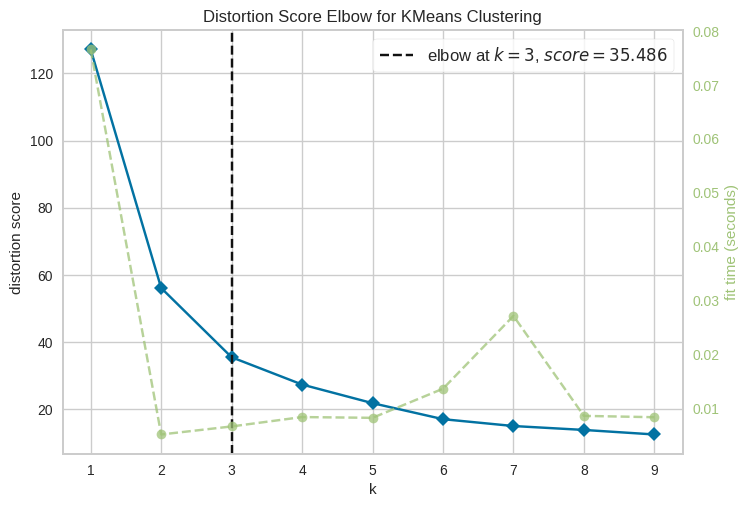

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
# Mengambil kolom 'TransactionAmount' dan 'TransactionDuration' dari dataset dan menyimpannya dalam array X
data_important = Bank_data[['TransactionAmount', 'TransactionDuration']].values

# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(data_important, columns=['TransactionAmount', 'TransactionDuration']))

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(data_important)
visualizer.show()

In [24]:
# Menggunakan algoritma K-Means Clustering
model_kmeans = KMeans(n_clusters=3, random_state=0)
model_kmeans.fit(data_important)

labels = model_kmeans.labels_
Bank_data['labels'] = labels

k = 3

def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]

        print(f"\nCluster {cluster_id + 1}:")
        for col in cluster_data.columns:
                mean_value = cluster_data[col].mean()
                print(f"Rata-rata {col}: {mean_value:.2f}")
        print("--------------------------------")
        for col in cluster_data.columns:
                median_value = cluster_data[col].median()
                print(f"Median {col}: {median_value:.2f}")
        print("--------------------------------")
        for col in cluster_data.columns:
                max_value = cluster_data[col].max()
                print(f"Nilai maksimum {col}: {max_value:.2f}")


analyze_clusters(Bank_data, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata TransactionAmount: 0.13
Rata-rata TransactionType: 1.00
Rata-rata Location: 21.22
Rata-rata Channel: 0.93
Rata-rata CustomerAge: 0.43
Rata-rata CustomerOccupation: 1.50
Rata-rata TransactionDuration: 0.45
Rata-rata AccountBalance: 0.35
Rata-rata Customer_Age_encoded: 3.26
Rata-rata labels: 0.00
--------------------------------
Median TransactionAmount: 0.10
Median TransactionType: 1.00
Median Location: 21.00
Median Channel: 1.00
Median CustomerAge: 0.45
Median CustomerOccupation: 1.00
Median TransactionDuration: 0.46
Median AccountBalance: 0.33
Median Customer_Age_encoded: 4.00
Median labels: 0.00
--------------------------------
Nilai maksimum TransactionAmount: 0.47
Nilai maksimum TransactionType: 1.00
Nilai maksimum Location: 43.00
Nilai maksimum Channel: 3.00
Nilai maksimum CustomerAge: 1.00
Nilai maksimum CustomerOccupation: 4.00
Nilai maksimum TransactionDuration: 0.63
Nilai maksimum AccountBalance: 1.00
Nilai maksimum 

Berikut Hasil Cluster

Jalankan cell code ini untuk menyimpan model kamu.

In [25]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [26]:
# Menghitung dan menampilkan nilai Silhouette Score.
# Calculate the silhouette score using the same data used to train the KMeans model
silhouette_avg = silhouette_score(data_important, model_kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.44039610529442763


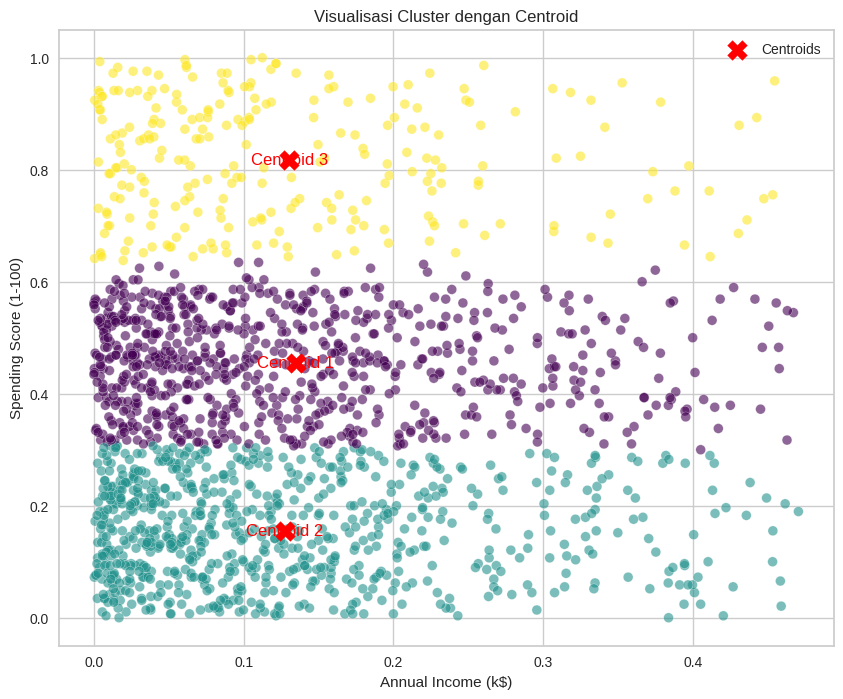

Nilai Centroids:
Centroid 1: Annual Income = 0.13, Spending Score = 0.45
Centroid 2: Annual Income = 0.13, Spending Score = 0.15
Centroid 3: Annual Income = 0.13, Spending Score = 0.82


In [27]:
# Membuat visualisasi hasil clustering
centroids = model_kmeans.cluster_centers_

# Menampilkan centroid dari setiap cluster
plt.figure(figsize=(10, 8))

# Plot data
plt.scatter(data_important[:, 0], data_important[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Annual Income = {centroid[0]:.2f}, Spending Score = {centroid[1]:.2f}")

**Membangun Model PCA**

            PC1       PC2  Target
0     14.757192  2.333273       1
1     -6.241603  2.385974       0
2      1.755650 -2.719917       1
3     11.754612 -1.794943       1
4      6.756754 -2.676578       0
...         ...       ...     ...
1756   8.755020  1.832311       1
1757  18.759049  1.380859       0
1758  14.753657  1.347598       0
1759 -11.244252 -2.707398       1
1760   7.757876  0.059233       1

[1761 rows x 3 columns]


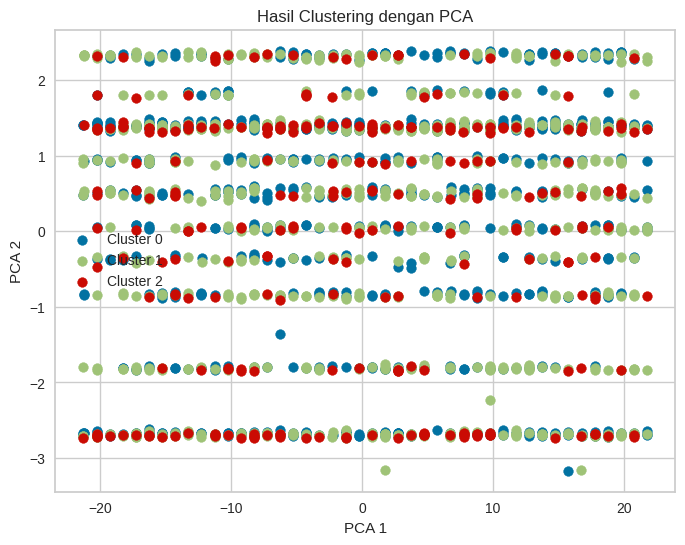

In [28]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2)
Bank_data_pca = pca.fit_transform(Bank_data)
pca_result = pd.DataFrame(data=Bank_data_pca, columns=['PC1', 'PC2'])
pca_result['Target'] = model_kmeans.labels_
print(pca_result)

plt.figure(figsize=(8, 6))
for cluster in range(3):
    cluster_data = pca_result[pca_result['Target'] == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster}')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Hasil Clustering dengan PCA')
plt.legend()
plt.show()

In [29]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [30]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
kolom_numerik = Bank_data.select_dtypes(include='number').columns
kolom_kategorikal = Bank_data[['TransactionType', 'Channel', 'CustomerOccupation']].columns

# Hitung agregasi numerik
agregasi_numerik = Bank_data.groupby('labels')[kolom_numerik].agg(['mean', 'min', 'max'])

# Tampilkan tabel dengan styling agar rapi
agregasi_numerik.style\
    .set_caption("Agregasi Mean, Min, Max per Label untuk Fitur Numerik")\
    .format(precision=2)\
    .background_gradient(axis=0, cmap='YlGnBu')\
    .set_table_styles([
        {'selector': 'caption',
         'props': [('color', 'Red'),
                   ('font-size', '16px'),
                   ('text-align', 'center'),
                   ('font-weight', 'bold')]}
    ])

<Figure size 1000x600 with 0 Axes>

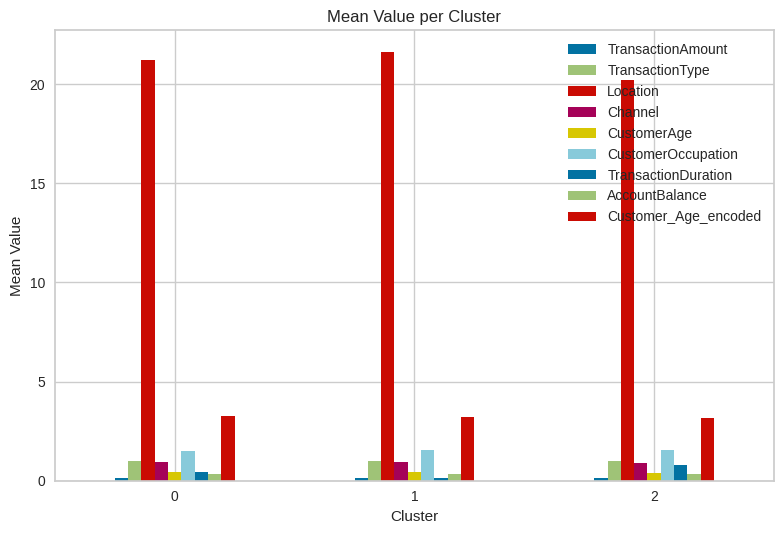



Modus Kategorikal :


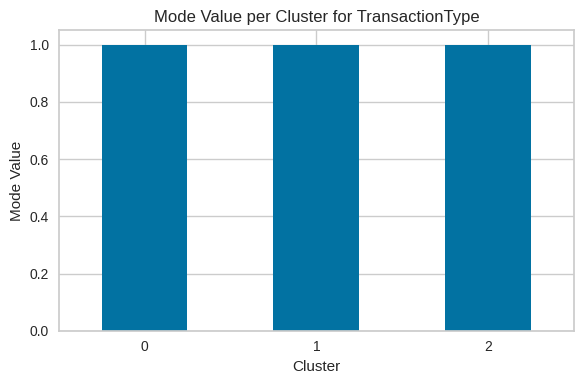

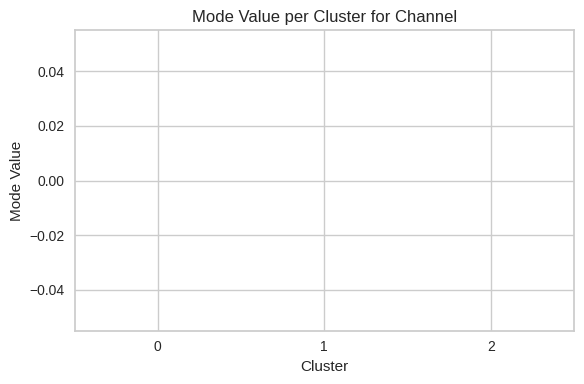

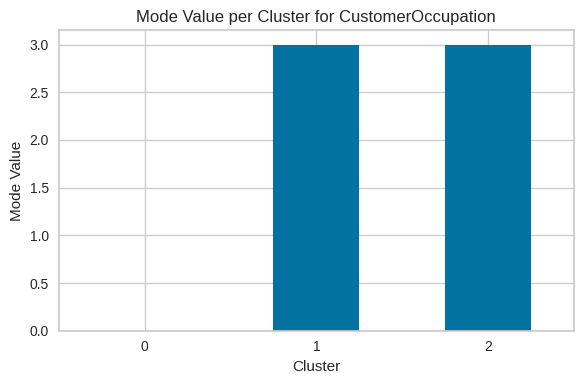

In [31]:
# Ambil nama kolom numerik kecuali 'TransactionAmount', 'CustomerAge', dan 'labels'
kolom_numerik = [col for col in Bank_data.select_dtypes(include='number').columns if col not in ['labels','CustomerAge_encoded']]

mean_per_cluster = Bank_data.groupby('labels')[kolom_numerik].mean()
plt.figure(figsize=(10, 6))
mean_per_cluster.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.title('Mean Value per Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n")

print("Modus Kategorikal :")
for col in kolom_kategorikal:
    # Modify the aggregation to take the first mode if multiple exist
    mode_per_cluster = Bank_data.groupby('labels')[col].agg(lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else None)
    plt.figure(figsize=(6, 4))
    mode_per_cluster.plot(kind='bar')
    plt.xlabel('Cluster')
    plt.ylabel('Mode Value')
    plt.title(f'Mode Value per Cluster for {col}')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [32]:
kolom_numerik = Bank_data.drop(columns='labels').select_dtypes(include='number').columns
scaler = MinMaxScaler()
scaler.fit(Bank_data[kolom_numerik])

df_inverse = pd.DataFrame(scaler.inverse_transform(Bank_data[kolom_numerik]), columns=kolom_numerik)
df_inverse['labels'] = Bank_data['labels']
print(df_inverse)

print("\n")
print("Rata-rata nilai asli per cluster:")
print(df_inverse.groupby('labels')[kolom_numerik].mean())

      TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0              0.003392              2.0    1548.0      0.0     0.838710   
1              0.092201              2.0     645.0      0.0     0.806452   
2              0.030906              2.0     989.0      6.0     0.016129   
3              0.045181              2.0    1419.0      6.0     0.129032   
4              0.022534              2.0    1204.0      0.0     0.000000   
...                 ...              ...       ...      ...          ...   
1756           0.022556              2.0    1290.0      3.0     0.677419   
1757           0.061621              2.0    1720.0      3.0     0.483871   
1758           0.006957              2.0    1548.0      3.0     0.612903   
1759           0.045541              2.0     430.0      6.0     0.080645   
1760           0.056859              2.0    1247.0      0.0     0.306452   

      CustomerOccupation  TransactionDuration  AccountBalance  \
0                    0

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (Berkeluarga)**:
  - Rata-rata TransactionAmount: 0.13
  - Rata-rata TransactionType: 1.00
  - Rata-rata Location: 21.22
  - Rata-rata Channel: 0.93
  - Rata-rata CustomerAge: 0.43
  - Rata-rata CustomerOccupation: 1.50
  - Rata-rata TransactionDuration: 0.45
  - Rata-rata AccountBalance: 0.35
  - Rata-rata Customer_Age_encoded: 3.26

   **Analisis:** cluster ini mencakup pelanggan memiliki keuangan yang tinggi. sehingga pada cluster ini cocok untuk kaum orang dewasa yang sudah berkeluarga dan memiliki pendapatan, Sehingga rekomendasi pada cluster ini adalah barang yang mewah dan memiliki nilai tinggi

2. **Cluster 2:(Dewasa)**:
  - Rata-rata TransactionAmount: 0.13
  - Rata-rata TransactionType: 1.00
  - Rata-rata Location: 21.63
  - Rata-rata Channel: 0.92
  - Rata-rata CustomerAge: 0.42
  - Rata-rata CustomerOccupation: 1.54
  - Rata-rata TransactionDuration: 0.15
  - Rata-rata AccountBalance: 0.33
  - Rata-rata Customer_Age_encoded: 3.21

  **Analisis:** cluster ini mencakup pelanggan memiliki keuangan yang tidak banyak dan tidak tinggi. sehingga pada cluster ini cocok untuk direkomendasikan barang barang sehari hari

3. **Cluster 3:(Muda)**:
   - Rata-rata TransactionAmount: 0.13
   - Rata-rata TransactionType: 1.00
   - Rata-rata Location: 20.18
   - Rata-rata Channel: 0.88
   - Rata-rata CustomerAge: 0.41
   - Rata-rata CustomerOccupation: 1.57
   - Rata-rata TransactionDuration: 0.82
   - Rata-rata AccountBalance: 0.32
   - Rata-rata Customer_Age_encoded: 3.15

  **Analisis:** cluster ini mencakup pelanggan memiliki keuangan yang tidak banyak. sehingga pada cluster ini cocok untuk kaum yang pendapatannya tidak banyak dan itu adalah kaum yang berumur kisaran 18-25 tahun atau masih anak muda, sehingga rekomendasi pada cluster ini adalah barang-barang yang trend



# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [33]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
Bank_data['Target'] = model_kmeans.labels_
Bank_data.drop(columns='labels', inplace=True)

print("Kolom saat ini:", Bank_data.columns)

Kolom saat ini: Index(['TransactionAmount', 'TransactionType', 'Location', 'Channel',
       'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'AccountBalance', 'Customer_Age_encoded', 'Target'],
      dtype='object')


In [34]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
Bank_data.to_csv('data_clustering.csv', index=False)

In [35]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1761 entries, 0 to 2524
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionAmount     1761 non-null   float64
 1   TransactionType       1761 non-null   int64  
 2   Location              1761 non-null   int64  
 3   Channel               1761 non-null   int64  
 4   CustomerAge           1761 non-null   float64
 5   CustomerOccupation    1761 non-null   int64  
 6   TransactionDuration   1761 non-null   float64
 7   AccountBalance        1761 non-null   float64
 8   Customer_Age_encoded  1761 non-null   int64  
 9   Target                1761 non-null   int32  
dtypes: float64(4), int32(1), int64(5)
memory usage: 209.0 KB


In [36]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.
scaled_coloumns = Bank_data.select_dtypes(include='number').columns
scaled_coloumns = scaled_coloumns.drop('Target')
Bank_data_normalized = {}
for col in scaled_coloumns:
    le = LabelEncoder()
    Bank_data[col] = le.fit_transform(Bank_data[col])
    Bank_data_normalized[col] = le.inverse_transform(Bank_data[col])
Bank_data.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,AccountBalance,Customer_Age_encoded,Target
0,84,0,36,0,52,0,71,916,4,1
1,1309,0,15,0,50,0,131,1707,4,0
2,636,0,23,2,1,3,46,327,0,1
3,836,0,33,2,8,3,15,1422,1,1
5,484,0,28,0,0,3,162,195,0,0


In [37]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
arr_inverse = Bank_data.iloc[:, [0, 1, 2, 3, 4, 5, 6]].values
print(arr_inverse.compress)
analyze_clusters(Bank_data, labels, k)

<built-in method compress of numpy.ndarray object at 0x7bb6cd6789f0>
Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata TransactionAmount: 882.09
Rata-rata TransactionType: 0.00
Rata-rata Location: 21.22
Rata-rata Channel: 0.93
Rata-rata CustomerAge: 26.73
Rata-rata CustomerOccupation: 1.50
Rata-rata TransactionDuration: 131.92
Rata-rata AccountBalance: 894.57
Rata-rata Customer_Age_encoded: 2.26
Rata-rata Target: 0.00
--------------------------------
Median TransactionAmount: 888.00
Median TransactionType: 0.00
Median Location: 21.00
Median Channel: 1.00
Median CustomerAge: 28.00
Median CustomerOccupation: 1.00
Median TransactionDuration: 133.00
Median AccountBalance: 898.50
Median Customer_Age_encoded: 3.00
Median Target: 0.00
--------------------------------
Nilai maksimum TransactionAmount: 1729.00
Nilai maksimum TransactionType: 0.00
Nilai maksimum Location: 43.00
Nilai maksimum Channel: 3.00
Nilai maksimum CustomerAge: 62.00
Nilai maksimum CustomerOccupation: 4.00
Nilai

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (Berkeluarga)**:
  - Rata-rata TransactionAmount: 882.09
  - Rata-rata TransactionType: 0.00
  - Rata-rata Location: 21.22
  - Rata-rata Channel: 0.93
  - Rata-rata CustomerAge: 26.73
  - Rata-rata CustomerOccupation: 1.50
  - Rata-rata TransactionDuration: 131.92
  - Rata-rata AccountBalance: 894.57
  - Rata-rata Customer_Age_encoded: 2.26

   **Analisis:** cluster ini mencakup pelanggan memiliki keuangan yang tinggi. sehingga pada cluster ini cocok untuk orang yang sudah berkeluarga dan memiliki pendapatan, Sehingga rekomendasi pada cluster ini adalah barang yang mewah dan memiliki nilai tinggi dilihat dari rata-rata AccountBalance yang paling tinggi

2. **Cluster 2:(Dewasa)**:
  - Rata-rata TransactionAmount: 844.81
  - Rata-rata TransactionType: 0.00
  - Rata-rata Location: 21.63
  - Rata-rata Channel: 0.92
  - Rata-rata CustomerAge: 26.17
  - Rata-rata CustomerOccupation: 1.54
  - Rata-rata TransactionDuration: 44.84
  - Rata-rata AccountBalance: 871.52
  - Rata-rata Customer_Age_encoded: 2.21

  **Analisis:** cluster ini mencakup pelanggan memiliki keuangan yang tidak banyak dan tidak tinggi. sehingga pada cluster ini cocok untuk direkomendasikan barang barang sehari hari dilihat dari AccountBalance yaitu 871.52

3. **Cluster 3:(Muda)**:
  - Rata-rata TransactionAmount: 858.34
  - Rata-rata TransactionType: 0.00
  - Rata-rata Location: 20.18
  - Rata-rata Channel: 0.88
  - Rata-rata CustomerAge: 25.61
  - Rata-rata CustomerOccupation: 1.57
  - Rata-rata TransactionDuration: 232.68
  - Rata-rata AccountBalance: 860.15
  - Rata-rata Customer_Age_encoded: 2.15
  - Rata-rata Target: 2.00

  **Analisis:** cluster ini mencakup pelanggan memiliki keuangan yang tidak banyak. sehingga pada cluster ini cocok untuk kaum yang pendapatannya tidak banyak dan itu adalah kaum yang berumur kisaran 18-25 tahun atau masih anak muda, sehingga rekomendasi pada cluster ini adalah barang-barang yang trend dilihat dari 871.AccountBalance paling kecil

**Interpretasi Hasil Clustering**

In [38]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
Bank_data['Target'] = model_kmeans.labels_

In [39]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
Bank_data.to_csv('data_clustering_inverse.csv', index=False)